# Book-Rec: A Book Reccommendation System 

Goodreads is a social cataloging website that allows individuals to search freely its database of books, annotations, quotes, and reviews. Users can sign up and register books to generate library catalogs and reading lists.

## About the Data:
This data was entirely scraped via the Goodreads API, so kudos to them for providing such a simple interface to scrape their database.
The dataset used in this analysis was posted by Soumik on Kaggle.

## DataSet quality:
<b>Usability Score:</b> 10.0

<b>License:</b> CC0: Public Domain

## Motivation:
I came across this dataset a while back, and at the time was learning about Reccommender systems. Being a bookworm myself, I thought it would be the perfect oppurtunity to combine the two worlds to make this notebook.

In [128]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Step 1: Examining the DataSet

In [129]:
data=pd.read_csv('books.csv',error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [130]:
#Describing the dataset
print("Dataset contains {} rows and {} columns".format(data.shape[0], data.shape[1]))

Dataset contains 11123 rows and 12 columns


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [132]:
#Checking for missing data
data.isnull().any().any()

False

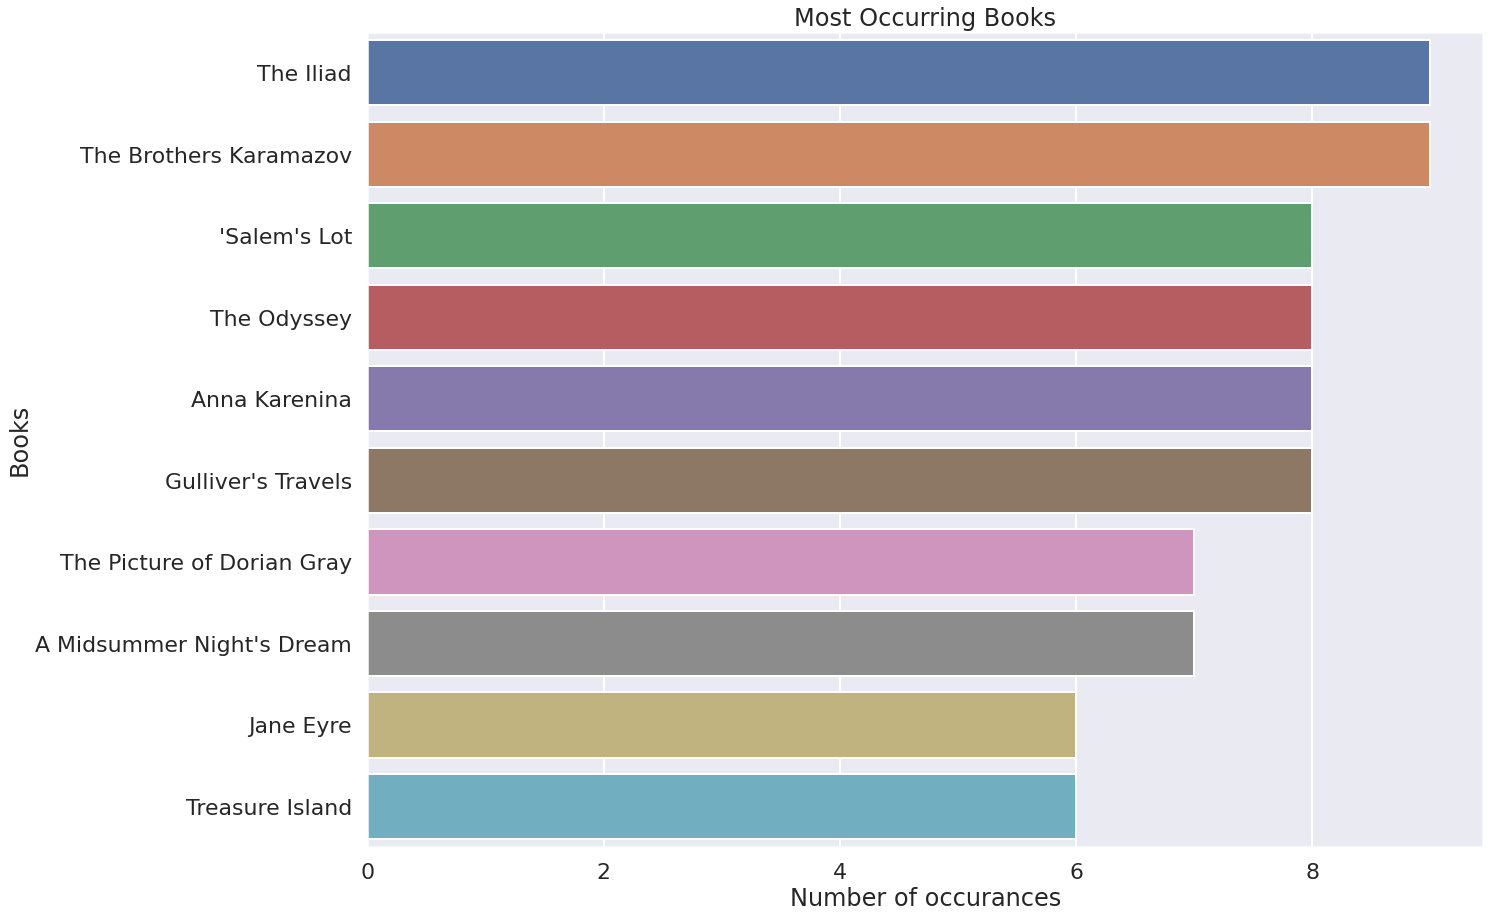

In [133]:
#Which books occur the most?
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = data['title'].value_counts()[:10]
rating = data.average_rating[:10]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

#### Interpretation: 
These books have come up in this database over and over again, with various publication editions, often the same books get published by multiple publishers at different points in time, which can be a measure of their popularity over time. 

However, looking at this list of the top 10 most frequently occuring books, we can see that a majority of the books are not as well known in today's world,but some have stood the test of time,namely:A midsummer's night dream & Gulliver's travels.

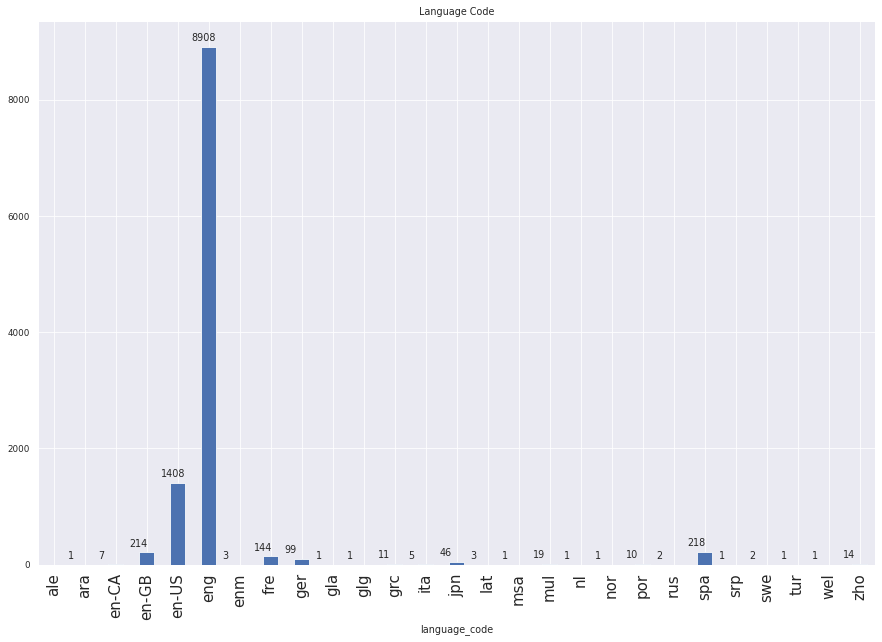

In [134]:
#Which languages are popular books written in?
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = data.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

#### Interpretation:
Spanish,French and German are the only other languages with any significant number of books, in that order respectively.

This could indicate that the dataset is highly biased towards data with english language, or could be a representation of the available data on the goodreads platform.

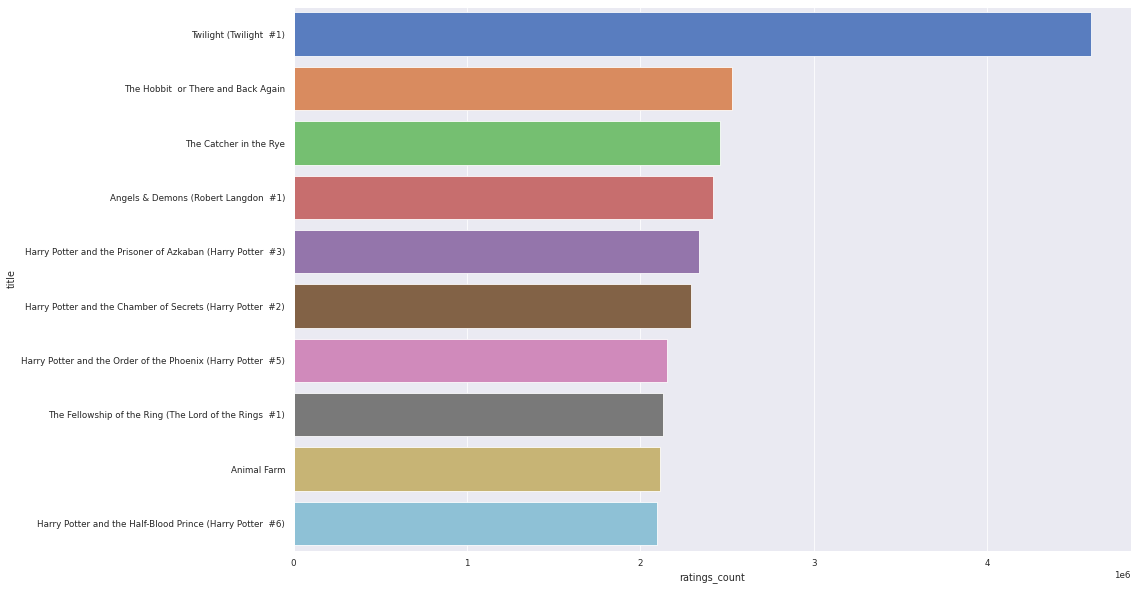

In [135]:
#Which Books recieved the most ratings?
most_rated = data.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='muted')

#### Interpretation:
Twilight is clearly the most rated book, followed by the hobit.

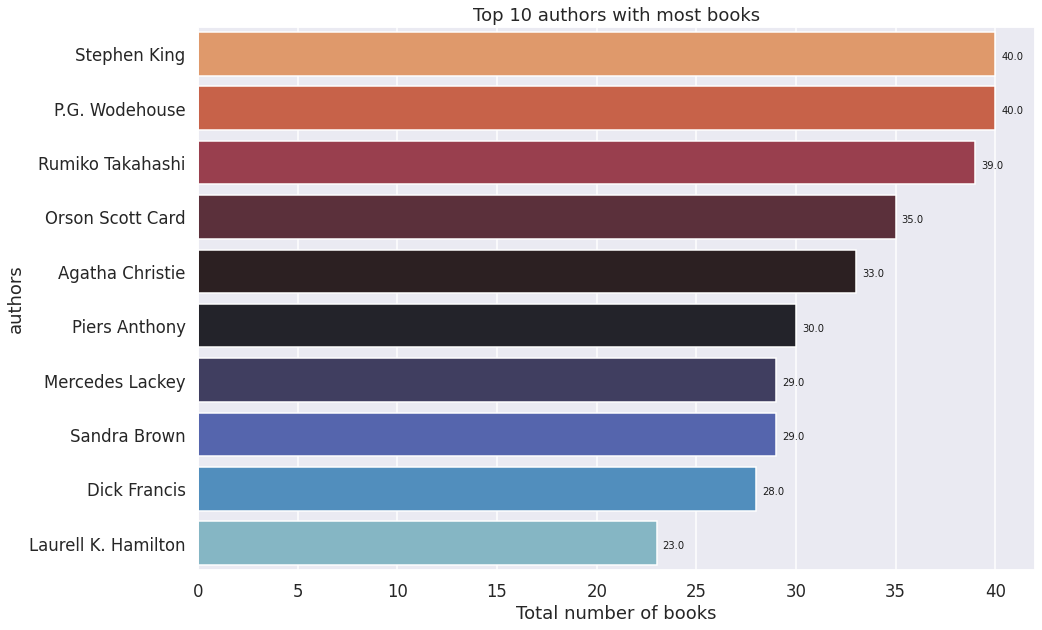

In [136]:
#Authors with the most books published?
sns.set_context('talk')
most_books = data.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

#### Interpretation:
Stephen King and PG Wodehouse have published the most books (tied at 40)

Text(0, 0.5, 'Number of Ratings')

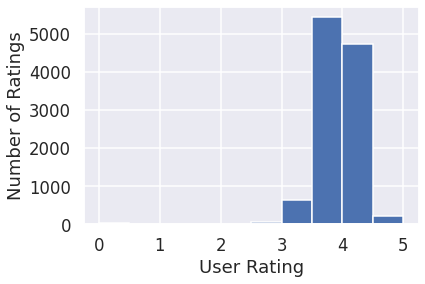

In [137]:
labels = data['average_rating']
plt.hist(labels)
plt.xlabel('User Rating')
plt.ylabel('Number of Ratings')

In [138]:
labels.describe()

count    11123.000000
mean         3.934075
std          0.350485
min          0.000000
25%          3.770000
50%          3.960000
75%          4.140000
max          5.000000
Name: average_rating, dtype: float64

In [139]:
labels.value_counts().head(n=10)

4.00    219
3.96    195
4.02    178
3.94    176
4.07    172
4.05    168
3.93    168
3.92    168
3.89    166
3.83    166
Name: average_rating, dtype: int64

#### Interpretation: 
We have 11,123 user ratings from the GoodReads dataset.

The average rating of a book given by a reader/user is 3.93 (approximately 4).

Most of the user's ratings lie between 3 and 5, and a good portion of these ratings are above 4 (out of 5 which is the maxiumum value), This means that goodread's catalogues are quite useful in suggesting books to readers.


### Recommendation System

To build our recommender system, we will take a Item based approach where books which our assumption is :

  <b>  "books that have a similarity between author,ratings and publishers are more likely to be related to each other."</b>

**Methodology:**

To build this system, we looked at the titles of the books,removed the stopwords,performed tf-idf vectorization of the titles and found cosine similarites between the books based on keywords in the name.


In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(stop_words='english')
data['title'] = data['title'].fillna('')
tfidf_matrix = tfidf.fit_transform(data['title'])

In [141]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [142]:
tfidf_matrix.shape

(11123, 11090)

In [143]:
#Array to map from feature integer indices to feature name
tfidf.get_feature_names()[5000:5010]

['idlewild',
 'idol',
 'idols',
 'idoru',
 'idvd',
 'ige',
 'ignatius',
 'iht',
 'ii',
 'iii']

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two books.

 We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate (especially when used in conjunction with TF-IDF scores, which will be explained later).



In [144]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [145]:
cosine_sim.shape

(11123, 11123)

In [146]:
cosine_sim[1]

array([0.71276342, 1.        , 0.72940912, ..., 0.        , 0.        ,
       0.        ])

In [147]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()

In [148]:
indices[:5]

title
Harry Potter and the Half-Blood Prince (Harry Potter  #6)       0
Harry Potter and the Order of the Phoenix (Harry Potter  #5)    1
Harry Potter and the Chamber of Secrets (Harry Potter  #2)      2
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)     3
Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)          4
dtype: int64

In [149]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the book that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with the given book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sorting the book based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the books indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return data['title'].iloc[book_indices]

In [150]:
get_recommendations('Stephen Hawking\'s Universe')

649      Stephen Hawking's Universe: The Cosmos Explained
4835    Stephen Hawking's a Brief History of Time: A R...
654                                    Falconry & Hawking
2863    The Stephen King Universe: A Guide to the Worl...
7699                           The Future of the Universe
655     The World Treasury of Physics  Astronomy & Mat...
2935                      Einstein: His Life and Universe
647                            The Universe in a Nutshell
2861    Stephen King from A to Z: An Encyclopedia of H...
2857             The Illustrated Stephen King Trivia Book
Name: title, dtype: object

In [151]:
get_recommendations('J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings')

4272                   The Lord of the Rings / The Hobbit
4283    The Lord of the Rings Millennium Edition Boxed...
724     The Lord of the Rings- 3 volumes set (The Lord...
2041         Tolkien: A Look Behind The Lord of the Rings
22      The Lord of the Rings (The Lord of the Rings  ...
24      The Lord of the Rings (The Lord of the Rings  ...
1695    The Lord of the Rings (The Lord of the Rings  ...
2042    The Lord of the Rings (The Lord of the Rings  ...
4276                                The Lord of the Rings
6841                               The Book of Five Rings
Name: title, dtype: object

In [152]:
get_recommendations('Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)')

6             Harry Potter Collection (Harry Potter  #1-6)
10675    Harry Potter and the Goblet of Fire (Harry Pot...
2        Harry Potter and the Chamber of Secrets (Harry...
4415     Harry Potter and the Chamber of Secrets (Harry...
1        Harry Potter and the Order of the Phoenix (Har...
10674    Harry Potter and the Philosopher's Stone (Harr...
8873     Harry Potter and the Sorcerer's Stone (Harry P...
0        Harry Potter and the Half-Blood Prince (Harry ...
615      Harry Potter and the Half-Blood Prince (Harry ...
3        Harry Potter and the Prisoner of Azkaban (Harr...
Name: title, dtype: object

# **Conclusion:**
We can see that our reccommender system is doing quite well in suggesting books of a series, but also of a certain category/theme. 